In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Step 1: Generate data

In [54]:
np.random.seed(0)
num_points = 1000
X = np.random.randint(0, 1000, num_points)  # Random integers between 0 and 1000
Y = np.where((X > 500) & (X < 800), 1, 0)  # Y=1 if 500 < X < 800, else Y=0

# Reshape X for sklearn
X_reshaped = X.reshape(-1, 1)

### Step 2: Fit Logistic Regression

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_reshaped, Y)
y1 = log_reg.predict(X_reshaped)  # Predict results for Logistic Regression

### Step 3: Fit SVM with RBF Kernel

In [56]:
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X_reshaped, Y)
y2_rbf = svm_rbf_model.predict(X_reshaped)  # Predict results for SVM (RBF kernel)

### Step 4: Fit SVM with Linear Kernel


In [57]:
svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(X_reshaped, Y)
y2_linear = svm_linear_model.predict(X_reshaped)  # Predict results for SVM (Linear kernel)

# Compute decision boundaries for visualization
x_range = np.linspace(0, 1000, 1000).reshape(-1, 1)
logistic_boundary = log_reg.predict_proba(x_range)[:, 1] >= 0.5
svm_rbf_boundary = svm_rbf_model.decision_function(x_range)
svm_linear_boundary = svm_linear_model.decision_function(x_range)

### Step 5: Evaluation

In [58]:
# Evaluate model accuracy on the training data
logistic_accuracy = accuracy_score(Y, y1)
svm_rbf_accuracy = accuracy_score(Y, y2_rbf)
svm_linear_accuracy = accuracy_score(Y, y2_linear)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"SVM (RBF Kernel) Accuracy: {svm_rbf_accuracy:.2f}")
print(f"SVM (Linear Kernel) Accuracy: {svm_linear_accuracy:.2f}")

Logistic Regression Accuracy: 0.58
SVM (RBF Kernel) Accuracy: 0.99
SVM (Linear Kernel) Accuracy: 0.70


### Step 6: Deployment (Visualization of Results)

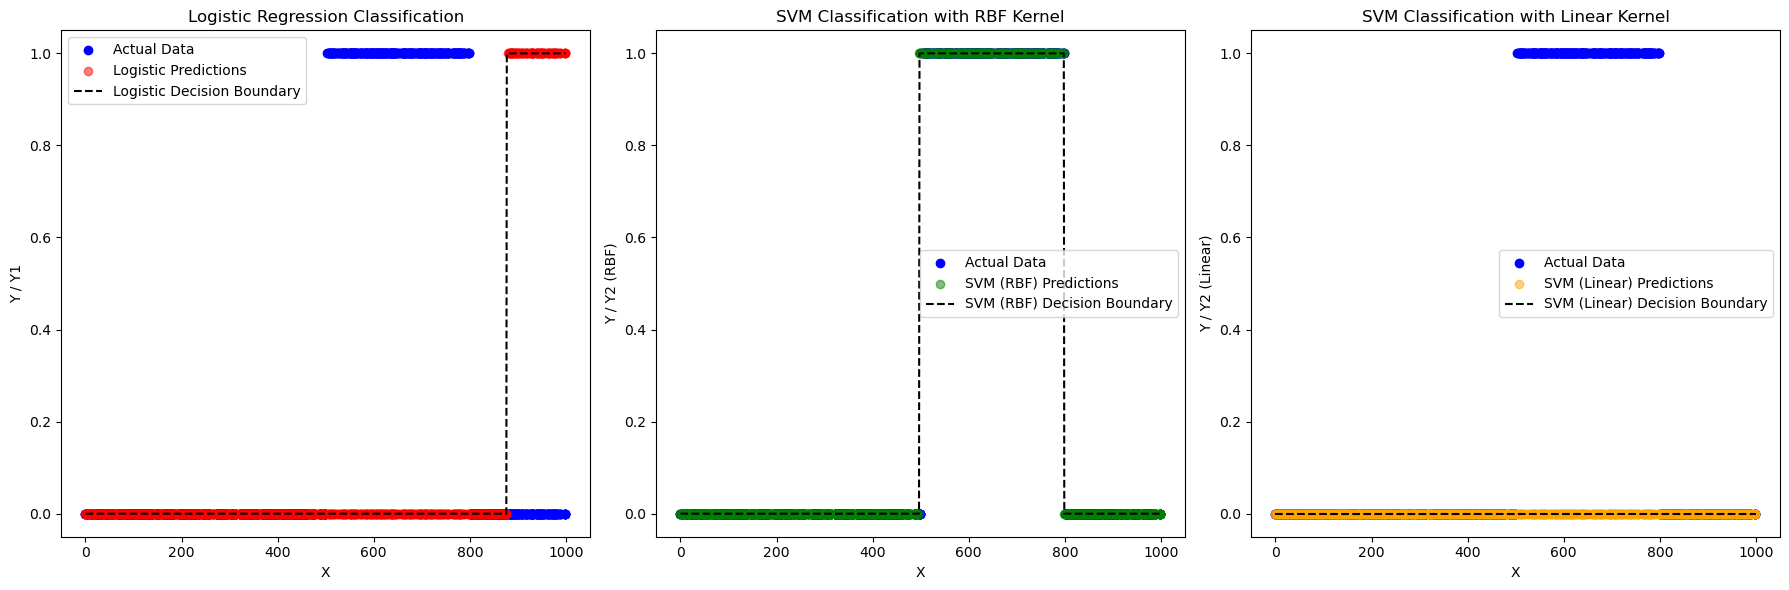

In [59]:
plt.figure(figsize=(18, 6))

# Plot for Logistic Regression
plt.subplot(1, 3, 1)
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.scatter(X, y1, color='red', label='Logistic Predictions', alpha=0.5)
plt.plot(x_range, logistic_boundary, 'k--', label='Logistic Decision Boundary')
plt.title("Logistic Regression Classification")
plt.xlabel("X")
plt.ylabel("Y / Y1")
plt.legend()

# Plot for SVM with RBF Kernel
plt.subplot(1, 3, 2)
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.scatter(X, y2_rbf, color='green', label='SVM (RBF) Predictions', alpha=0.5)
plt.plot(x_range, (svm_rbf_boundary >= 0).astype(int), 'k--', label='SVM (RBF) Decision Boundary')
plt.title("SVM Classification with RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y / Y2 (RBF)")
plt.legend()

# Plot for SVM with Linear Kernel
plt.subplot(1, 3, 3)
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.scatter(X, y2_linear, color='orange', label='SVM (Linear) Predictions', alpha=0.5)
plt.plot(x_range, (svm_linear_boundary >= 0).astype(int), 'k--', label='SVM (Linear) Decision Boundary')
plt.title("SVM Classification with Linear Kernel")
plt.xlabel("X")
plt.ylabel("Y / Y2 (Linear)")
plt.legend()

plt.tight_layout()
plt.show()